In [1]:
from neural_network import *

from matplotlib import pyplot as plt

In [2]:
file_path = "../Data/01_Inicial_v11.xlsx"

D = Data_loader(file_path,seed=0,device='cpu')

In [3]:
input_size1 = 5
output_size1 = 2
input_size2 = 3
output_size2 = 2

NN = Neural_network(input_size1,output_size1,input_size2,output_size2,device='cpu')

NN.set_norms(D.X1_norm,D.X2_norm,D.Y1_norm,D.Y2_norm)

In [4]:
# Set hyperparameters
n_epochs1 = 1000
batch_size1 = 80
n_epochs2 = 1000
batch_size2 = 80
n_epochs3 = 1000
batch_size3 = 80

lr10 = -2.4548213836404047
lr1 = 10**lr10
lr2 = 10**lr10
lr3 = 10**lr10

gamma = 0.5519798350435665

scheduler_step1 = 100
scheduler_gamma1 = gamma

scheduler_step2 = 100
scheduler_gamma2 = gamma

scheduler_step3 = 100
scheduler_gamma3 = gamma

layers1 = [25 for _ in range(1)]
layers2 = [39 for _ in range(2)]

dropout1 = 0.2
dropout2 = 0.2

In [5]:
# Pre-train the first network
NN.init_net1(layers=layers1, dropout=dropout1)

loss1_train_pre = []
loss1_val_pre = []

opt1 = torch.optim.Adam(NN.net1.parameters(),lr=lr1)
sch1 = torch.optim.lr_scheduler.StepLR(opt1, step_size=scheduler_step1, gamma=scheduler_gamma1)

for epoch in range(n_epochs1):

  NN.net1.train()
  opt1.zero_grad()

  loss_train_epoch = 0
  loss_val_epoch = 0

  for X1, Y1_target in D.get_batch1(batch_size=batch_size1):
    Y1_pred = NN.net1(X1)
    loss = torch.nn.functional.mse_loss(Y1_target, Y1_pred, reduction='sum')
    loss.backward()
    opt1.step()

    loss_train_epoch += loss.item()

  NN.net1.eval()
  with torch.no_grad():
    for X1, Y1_target in D.get_batch1(batch_size=batch_size1,validation=True):
      Y1_pred = NN.net1(X1)
      loss = torch.nn.functional.mse_loss(Y1_target, Y1_pred, reduction='sum')

      loss_val_epoch += loss.item()

  loss_train_epoch = loss_train_epoch/(D.n_train*output_size1)
  loss_val_epoch = loss_val_epoch/(D.n_val*output_size1)

  loss1_train_pre.append(loss_train_epoch)
  loss1_val_pre.append(loss_val_epoch)

  sch1.step()

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss_train_epoch}, Validation loss: {loss_val_epoch}')

Epoch: 0, Loss: 1.248345673686326, Validation loss: 1.488863983154297
Epoch: 10, Loss: 0.49358834160698783, Validation loss: 0.5753692245483398
Epoch: 20, Loss: 0.22529842877628828, Validation loss: 0.12952030181884766
Epoch: 30, Loss: 0.14576835222918577, Validation loss: 0.06277786254882813
Epoch: 40, Loss: 0.0948243984068283, Validation loss: 0.04488697528839111
Epoch: 50, Loss: 0.10060025947262542, Validation loss: 0.0403258228302002
Epoch: 60, Loss: 0.08631632906017882, Validation loss: 0.031061766147613527
Epoch: 70, Loss: 0.08002780663846719, Validation loss: 0.02905959129333496
Epoch: 80, Loss: 0.07922961013485687, Validation loss: 0.029338696002960206
Epoch: 90, Loss: 0.07602081395158863, Validation loss: 0.02387826681137085
Epoch: 100, Loss: 0.06756232483218415, Validation loss: 0.02293473243713379
Epoch: 110, Loss: 0.07556457953019576, Validation loss: 0.023517022132873534
Epoch: 120, Loss: 0.07165290972199102, Validation loss: 0.021133768558502197
Epoch: 130, Loss: 0.070457

In [6]:
# Train the second network
NN.init_net2(layers=layers2, dropout=dropout2)

loss1_train = []
loss1_val = []
loss2_train = []
loss2_val = []
loss_train = []
loss_val = []

opt2 = torch.optim.Adam(NN.net2.parameters(),lr=lr2)
sch2 = torch.optim.lr_scheduler.StepLR(opt2, step_size=scheduler_step2, gamma=scheduler_gamma2)

for epoch in range(n_epochs2):
  NN.train()
  opt2.zero_grad()

  loss_train_epoch = 0
  loss_val_epoch = 0

  loss1_train_epoch = 0
  loss1_val_epoch = 0

  loss2_train_epoch = 0
  loss2_val_epoch = 0

  for X, Y_target in D.get_batch2(batch_size=batch_size2):
    Y_pred = NN(X)
    loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
    loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
    loss = loss1 + loss2

    loss.backward()
    opt2.step()

    loss_train_epoch += loss.item()
    loss1_train_epoch += loss1.item()
    loss2_train_epoch += loss2.item()

  NN.eval()
  with torch.no_grad():
    for X, Y_target in D.get_batch2(batch_size=batch_size2,validation=True):
      Y_pred = NN(X)
      loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
      loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
      loss = loss1 + loss2

      loss_val_epoch += loss.item()
      loss1_val_epoch += loss1.item()
      loss2_val_epoch += loss2.item()

  loss1_train_epoch = loss1_train_epoch/(D.n_train2*output_size1)
  loss1_val_epoch = loss1_val_epoch/(D.n_val2*output_size1)
  loss2_train_epoch = loss2_train_epoch/(D.n_train2*output_size2)
  loss2_val_epoch = loss2_val_epoch/(D.n_val2*output_size2)
  loss_train_epoch = loss_train_epoch/(D.n_train2*(output_size1+output_size2))
  loss_val_epoch = loss_val_epoch/(D.n_val2*(output_size1+output_size2))

  loss1_train.append(loss1_train_epoch)
  loss1_val.append(loss1_val_epoch)
  loss2_train.append(loss2_train_epoch)
  loss2_val.append(loss2_val_epoch)
  loss_train.append(loss_train_epoch)
  loss_val.append(loss_val_epoch)

  sch2.step()

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss_train_epoch} ({loss1_train_epoch} + {loss2_train_epoch}), Validation loss: {loss_val_epoch} ({loss1_val_epoch} + {loss2_val_epoch})')

Epoch: 0, Loss: 0.5322667131520281 (0.0674895602043229 + 0.9970438408129143), Validation loss: 0.4962680053710937 (0.01634458303451538 + 0.97619140625)
Epoch: 10, Loss: 0.1525184674696489 (0.05566113284139922 + 0.24937579607722735), Validation loss: 0.09544938087463378 (0.016344584226608276 + 0.1745541763305664)
Epoch: 20, Loss: 0.11673216627101705 (0.057411298607334946 + 0.17605302791402797), Validation loss: 0.059480834007263186 (0.01634458303451538 + 0.1026170825958252)
Epoch: 30, Loss: 0.08917096889380252 (0.04619262676046352 + 0.13214930621060458), Validation loss: 0.061918320655822756 (0.01634458303451538 + 0.10749205589294433)
Epoch: 40, Loss: 0.10277668394223609 (0.055334518654177885 + 0.15021885284269698), Validation loss: 0.06560994625091553 (0.01634458303451538 + 0.11487530708312989)
Epoch: 50, Loss: 0.08920515667308461 (0.05759453171431416 + 0.12081578042772081), Validation loss: 0.04884784698486328 (0.01634458303451538 + 0.0813511085510254)
Epoch: 60, Loss: 0.0937298355680

In [7]:
# Fine-tune both networks
opt3 = torch.optim.Adam(NN.parameters(),lr=lr3)
sch3 = torch.optim.lr_scheduler.StepLR(opt3, step_size=scheduler_step3, gamma=scheduler_gamma3)

for epoch in range(n_epochs3):
  NN.train()
  opt3.zero_grad()

  loss_train_epoch = 0
  loss_val_epoch = 0

  loss1_train_epoch = 0
  loss1_val_epoch = 0

  loss2_train_epoch = 0
  loss2_val_epoch = 0

  for X, Y_target in D.get_batch2(batch_size=batch_size3):
    Y_pred = NN(X)
    loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
    loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
    loss = loss1 + loss2

    loss.backward()
    opt3.step()

    loss_train_epoch += loss.item()
    loss1_train_epoch += loss1.item()
    loss2_train_epoch += loss2.item()

  NN.eval()
  with torch.no_grad():
    for X, Y_target in D.get_batch2(batch_size=batch_size3,validation=True):
      Y_pred = NN(X)
      loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
      loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
      loss = loss1 + loss2

      loss_val_epoch += loss.item()
      loss1_val_epoch += loss1.item()
      loss2_val_epoch += loss2.item()

  loss1_train_epoch = loss1_train_epoch/(D.n_train2*output_size1)
  loss1_val_epoch = loss1_val_epoch/(D.n_val2*output_size1)
  loss2_train_epoch = loss2_train_epoch/(D.n_train2*output_size2)
  loss2_val_epoch = loss2_val_epoch/(D.n_val2*output_size2)
  loss_train_epoch = loss_train_epoch/(D.n_train2*(output_size1+output_size2))
  loss_val_epoch = loss_val_epoch/(D.n_val2*(output_size1+output_size2))

  loss1_train.append(loss1_train_epoch)
  loss1_val.append(loss1_val_epoch)
  loss2_train.append(loss2_train_epoch)
  loss2_val.append(loss2_val_epoch)
  loss_train.append(loss_train_epoch)
  loss_val.append(loss_val_epoch)

  sch3.step()

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss_train_epoch} ({loss1_train_epoch} + {loss2_train_epoch}), Validation loss: {loss_val_epoch} ({loss1_val_epoch} + {loss2_val_epoch})')

Epoch: 0, Loss: 0.057492848598595825 (0.05811868051085809 + 0.05686701367599795), Validation loss: 0.053360366821289064 (0.021327295303344727 + 0.0853934383392334)
Epoch: 10, Loss: 0.06827257618759618 (0.05915786882843634 + 0.07738728475089025), Validation loss: 0.04987558364868164 (0.017423918247222902 + 0.08232725143432618)
Epoch: 20, Loss: 0.0792907127226242 (0.06197717093458079 + 0.09660425330653336), Validation loss: 0.04789308547973633 (0.021215155124664306 + 0.07457101821899415)
Epoch: 30, Loss: 0.06678759088419904 (0.05896585637872869 + 0.07460932358346804), Validation loss: 0.049824919700622555 (0.01916645884513855 + 0.08048337936401367)
Epoch: 40, Loss: 0.07215852809674812 (0.0712719348946003 + 0.073045116482359), Validation loss: 0.0526530122756958 (0.018267320394515993 + 0.0870387077331543)
Epoch: 50, Loss: 0.06324236079899952 (0.055279498148446134 + 0.07120522224541867), Validation loss: 0.04457441329956055 (0.015772422552108766 + 0.07337640285491943)
Epoch: 60, Loss: 0.05

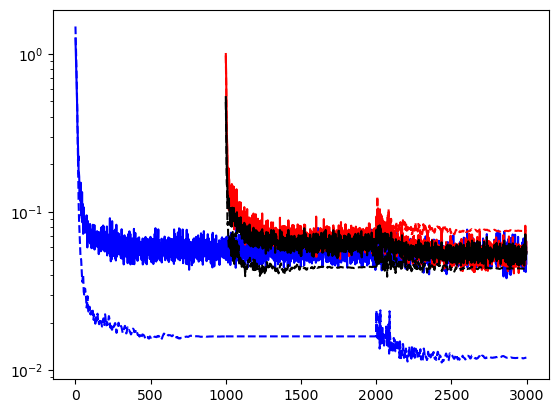

In [8]:
plt.figure()

epochs1 = range(len(loss1_train_pre))
epochs2 = range(len(loss1_train_pre),len(loss1_train_pre)+len(loss_train))

plt.plot(epochs1,loss1_train_pre,'b')
plt.plot(epochs1,loss1_val_pre,'b--')

plt.plot(epochs2,loss1_train,'b')
plt.plot(epochs2,loss1_val,'b--')

plt.plot(epochs2,loss2_train,'r')
plt.plot(epochs2,loss2_val,'r--')

plt.plot(epochs2,loss_train,'k')
plt.plot(epochs2,loss_val,'k--')

plt.yscale('log') 


In [9]:
NN.save('model.pt')

In [10]:
NN

Neural_network(
  (net1): Sequential(
    (0): Linear(in_features=5, out_features=25, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=25, out_features=2, bias=True)
  )
  (net2): Sequential(
    (0): Linear(in_features=10, out_features=39, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=39, out_features=39, bias=True)
    (4): Dropout(p=0.2, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=39, out_features=2, bias=True)
  )
)